In [16]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, io
from skimage.feature import register_translation
from scipy.ndimage import fourier_shift

image = io.imread("data/images/00000.jpg")
offset_image = io.imread("data/images/00001.jpg")
# offset image translated by (-17.45, 18.75) in y and x 

# subpixel precision
#Upsample factor 100 = images will be registered to within 1/100th of a pixel.
#Default is 1 which means no upsampling.  
shifted, error, diffphase = register_translation(image, offset_image, 100)
print(f"Detected subpixel offset (y, x): {shifted}")

from scipy.ndimage import shift
corrected_image = shift(offset_image, shift=(shifted[0], shifted[1]), mode='constant')
#plt.imshow(corrected_image)

ImportError: cannot import name 'register_translation' from 'skimage.feature' (C:\Users\gunwoo\anaconda3\envs\regi\lib\site-packages\skimage\feature\__init__.py)

In [14]:
import cv2
import numpy as np

img1 = io.imread("data/images/00000.jpg")
img2 = io.imread("data/images/00001.jpg")

orb = cv2.ORB_create(50)
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

matches = matcher.match(des1, des2, None)
matches = sorted(matches, key= lambda x:x.distance)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None)




  Using cached image_registration-0.2.5-py3-none-any.whl
  Using cached astropy-5.0.4-cp38-cp38-win_amd64.whl (6.4 MB)
  Using cached numpy-1.22.3-cp38-cp38-win_amd64.whl (14.7 MB)
  Using cached PyYAML-6.0-cp38-cp38-win_amd64.whl (155 kB)
  Using cached pyerfa-2.0.0.1-cp38-cp38-win_amd64.whl (366 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached pyparsing-3.0.8-py3-none-any.whl (98 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Estimated homography : 
 [[ 1.05479120e+00  4.33462905e-02 -6.30755908e+00]
 [ 3.18466601e-02  1.05091781e+00  1.73820361e+00]
 [ 1.53879368e-04  1.08611337e-04  1.00000000e+00]]


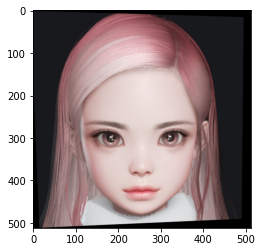

In [18]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image1 = cv2.imread('data/images/16136.jpg')
image2 = cv2.imread('data/images/16190.jpg')

im2 = cv2.imread('data/images/16190.jpg')[:300,:]          # Image that needs to be registered.
im1 = cv2.imread('data/images/16136.jpg')[:300,:]  # trainImage

img1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

# Initiate ORB detector
orb = cv2.ORB_create(50)  #Registration works with at least 50 points

# find the keypoints and descriptors with orb
kp1, des1 = orb.detectAndCompute(img1, None)  #kp1 --> list of keypoints
kp2, des2 = orb.detectAndCompute(img2, None)

matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

matches = matcher.match(des1, des2, None)  #Creates a list of all matches, just like keypoints
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(im1,kp1, im2, kp2, matches[:10], None)

points1 = np.zeros((len(matches), 2), dtype=np.float32)  #Prints empty array of size equal to (matches, 2)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
   points1[i, :] = kp1[match.queryIdx].pt    #gives index of the descriptor in the list of query descriptors
   points2[i, :] = kp2[match.trainIdx].pt    #gives index of the descriptor in the list of train descriptors


h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
 
  # Use homography
height, width, channels = image2.shape
im1Reg = cv2.warpPerspective(image1, h, (width, height))  #Applies a perspective transformation to an image.
   
print("Estimated homography : \n",  h)
plt.imshow(im1Reg[:,:,::-1])

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os



def registration_ref(in_path, out_path):
    # if not os.path.exists(out_path):
    os.makedirs(out_path, exist_ok=True)

    filenames = os.listdir(in_path)
    for filename in filenames:

      image1 = cv2.imread(os.path.join(in_path, filename))
      image2 = cv2.imread('data/images/16190.jpg')

      im1 = image1  # trainImage
      im2 = image2          # Image that needs to be registered.

      img1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
      img2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
    
      orb = cv2.ORB_create(5000)

      kp2, des2 = orb.detectAndCompute(img1, None)
      kp1, des1 = orb.detectAndCompute(img2, None)
      
      matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

      matches = matcher.match(des1, des2, None)  #Creates a list of all matches, just like keypoints
      matches = sorted(matches, key = lambda x:x.distance)

      points1 = np.zeros((len(matches), 2), dtype=np.float32)  #Prints empty array of size equal to (matches, 2)
      points2 = np.zeros((len(matches), 2), dtype=np.float32)

      for i, match in enumerate(matches):
        points1[i, :] = kp1[match.queryIdx].pt    #gives index of the descriptor in the list of query descriptors
        points2[i, :] = kp2[match.trainIdx].pt    #gives index of the descriptor in the list of train descriptors


      h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
      print(h)
      return
      height, width, channels = image2.shape
      im1Reg = cv2.warpPerspective(image1, h, (width, height))  #Applies a perspective transformation to an image.
      cv2.imwrite(os.path.join(out_path, filename), im1Reg)

registration_ref('data/images', 'data_preprocessing')


[[ 9.75946061e-01  8.33499701e-03 -2.50240516e+00]
 [-5.65342832e-03  9.43422414e-01  9.54491772e+00]
 [-3.28990684e-05 -3.99155230e-05  1.00000000e+00]]


In [6]:
h

NameError: name 'h' is not defined

In [45]:
import albumentations as A


In [54]:
func = A.RandomResizedCrop(512,512, ratio=(1, 1))

In [57]:
image2 = cv2.imread('data/images/16190.jpg')
im2 = func(image = image2)
# plt.imshow(im2[:,:,::-1])

In [60]:
im2.keys()

dict_keys(['image'])